## Homework 10

1.Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated.

In [189]:
import numpy as np
from numpy import arccos, dot
from numpy.linalg import norm


def angle_between(v1,v2):
    theta = \
    arccos(dot(v1, v2.T)/(norm(v1)*norm(v2)))
    return theta

v = np.array([[10, 9, 3]])
w = np.array([[2, 5, 12]])

angle_between(v,w)

array([[0.97992471]])

2.Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).

In [190]:
def row_dot(A,r1,r2):
    return np.dot(A[r1],A[r2])

M = np.array([[1,1,1,1], 
             [3,2,8,1],
             [2,2,1,1]])

row_dot(M,0,2)

6

3.Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

Based on what I found, there's no such thing as matrix division. The closest equivalent to division is multiplying the matrix by the inverse of another matrix. So the function below first calculates the inverse of one of the matrices and then multiplies the first one by the inversed second matrix.

In [192]:
from numpy.linalg import inv

def matrix_division(m1,m2):
    inverted = inv(m2)
    return np.dot(m1, inverted)

N = np.array([[2,2,1,3], 
             [3,2,8,1], 
             [1,1,5,4],
             [2,3,3,1]])

M = np.array([[0,2,1,3], 
             [3,2,8,1], 
             [1,0,0,3],
             [0,3,2,1]])

matrix_division(N,M)

array([[-2.15789474e+00, -1.57894737e-01,  2.47368421e+00,
         2.21052632e+00],
       [ 0.00000000e+00,  1.00000000e+00,  2.22044605e-16,
        -4.44089210e-16],
       [ 3.31578947e+00,  8.15789474e-01, -1.44736842e+00,
        -2.42105263e+00],
       [-2.47368421e+00,  2.63157895e-02,  1.92105263e+00,
         2.63157895e+00]])

4.Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol|π/2−θ|<tol, and 0 otherwise. You may assume that v1 and v2 are column vectors of the same size, and that tol is a positive scalar.

In [193]:
import math
def is_orthogonal(v1,v2,tol):
    v1 = np.squeeze(np.asarray(v1))
    v2 = np.squeeze(np.asarray(v2))
    theta_new = abs(math.pi/2 - angle_between(v1,v2))
    if theta_new < tol:
        return 1
    else:
        return 0
    
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
# output: 1
is_orthogonal(a,b, 0.01)

1

In [196]:
# Test cases for problem 4
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
# output: 1
print(is_orthogonal(a,b, 0.01))

# output: 0
print(is_orthogonal(a,b, 0.001))

# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
print(is_orthogonal(a,b, 0.01))

# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
print(is_orthogonal(a,b, 1e-10))


1
0
0
1


5.Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4.

In [194]:
class vector_calculator():
    
    def __init__(self, vector1, vector2):
        self.vector1 = vector1
        self.vector2 = vector2
        
    def angle_between(self):
        theta = \
        arccos(dot(self.vector1, self.vector2.T)/(norm(self.vector1)*norm(self.vector2)))
        return theta
    
    def is_orthogonal(self, tol = 0.01):
        vector1 = np.squeeze(np.asarray(self.vector1))
        vector2 = np.squeeze(np.asarray(self.vector2))
        theta_new = abs(math.pi/2 - angle_between(vector1, vector2))
        if theta_new < tol:
            return 1
        else:
            return 0
        
v = np.array([[10, 9, 3]])
w = np.array([[2, 5, 12]])

Vector1 = vector_calculator(v,w)
Vector1.angle_between() #testing angle_between with class

array([[0.97992471]])

In [134]:
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])

Vector2 = vector_calculator(a,b)
Vector2.is_orthogonal() #testing is_orthogonal with class with defaut tol

1

6.Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

## PCA
PCA stands for Principal Component Analysis which is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are  features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

In [138]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [140]:
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))

In [141]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [142]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)

In [143]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [145]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

In [146]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [147]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [153]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [154]:
pip install tensorflow #used in machine learning

     |████████████████████████████████| 173.9 MB 476 bytes/s a 0:00:01    |█████████████████▌              | 95.2 MB 12.2 MB/s eta 0:00:07     |██████████████████████          | 119.4 MB 10.6 MB/s eta 0:00:06     |████████████████████████        | 130.1 MB 9.4 MB/s eta 0:00:05███████████████▋| 171.8 MB 49.2 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 901 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.1 MB/s  eta 0:00:01
     |████████████████████████████████| 462 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 781 kB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 8.2 MB/s  eta 0

In [155]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 15s 0us/step


In [156]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


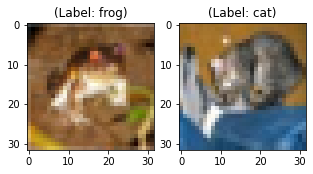

In [159]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In [160]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [161]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [162]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [163]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [164]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])


In [165]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


<Figure size 432x288 with 0 Axes>

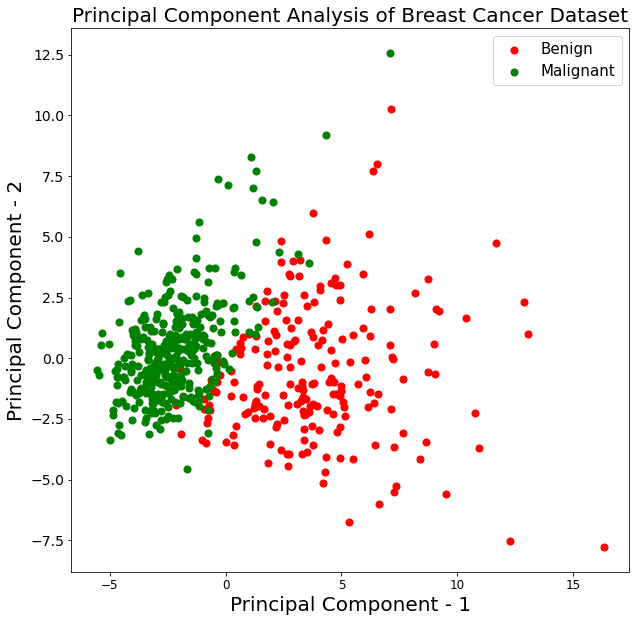

In [166]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [167]:
np.min(x_train),np.max(x_train)
x_train = x_train/255.0

In [168]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [169]:
x_train.shape

(50000, 32, 32, 3)

In [170]:
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [171]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [172]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [173]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

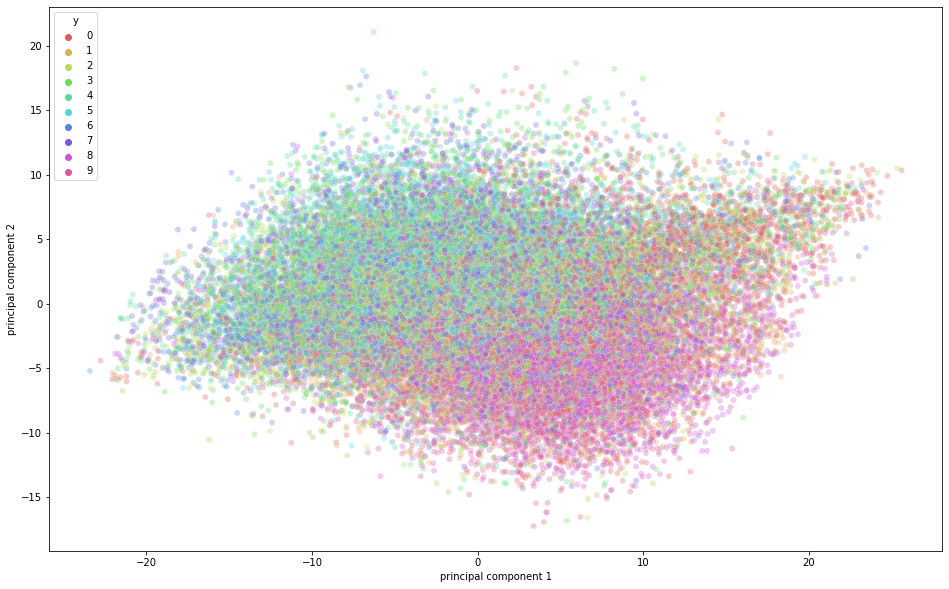

In [174]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [175]:
x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)

In [176]:
x_test_flat = x_test.reshape(-1,3072)

In [177]:
pca = PCA(0.9)

In [178]:
pca.fit(x_train_flat)

PCA(n_components=0.9)

In [179]:
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

In [180]:
pca.n_components_

99

In [181]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [182]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

In [183]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [184]:
batch_size = 128
num_classes = 10
epochs = 20

In [185]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [186]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              102400    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [187]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 16s 37ms/step - loss: 1.8206 - accuracy: 0.3565 - val_loss: 1.4865 - val_accuracy: 0.4757
Epoch 2/20
391/391 [==============================] - 13s 34ms/step - loss: 1.3446 - accuracy: 0.5228 - val_loss: 1.3613 - val_accuracy: 0.5229
Epoch 3/20
391/391 [==============================] - 15s 38ms/step - loss: 1.1400 - accuracy: 0.5963 - val_loss: 1.2901 - val_accuracy: 0.5486
Epoch 4/20
391/391 [==============================] - 14s 35ms/step - loss: 0.9716 - accuracy: 0.6532 - val_loss: 1.2858 - val_accuracy: 0.5538
Epoch 5/20
391/391 [==============================] - 14s 36ms/step - loss: 0.8099 - accuracy: 0.7114 - val_loss: 1.3444 - val_accuracy: 0.5540
Epoch 6/20
391/391 [==============================] - 20s 51ms/step - loss: 0.6637 - accuracy: 0.7622 - val_loss: 1.4677 - val_accuracy: 0.5598
Epoch 7/20
391/391 [==============================] - 25s 64ms/step - loss: 0.5279 - accuracy: 0.8104 - val_loss: 1.6646 - val_accuracy:

In [188]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
391/391 [==============================] - 47s 118ms/step - loss: 2.7989 - accuracy: 0.1818 - val_loss: 1.9310 - val_accuracy: 0.3009
Epoch 2/20
391/391 [==============================] - 34s 88ms/step - loss: 1.8722 - accuracy: 0.3225 - val_loss: 1.7367 - val_accuracy: 0.3753
Epoch 3/20
391/391 [==============================] - 41s 104ms/step - loss: 1.7521 - accuracy: 0.3706 - val_loss: 1.8823 - val_accuracy: 0.3341
Epoch 4/20
391/391 [==============================] - 49s 126ms/step - loss: 1.6661 - accuracy: 0.4069 - val_loss: 1.6082 - val_accuracy: 0.4276
Epoch 5/20
391/391 [==============================] - 44s 111ms/step - loss: 1.6190 - accuracy: 0.4230 - val_loss: 1.6195 - val_accuracy: 0.4165
Epoch 6/20
391/391 [==============================] - 49s 126ms/step - loss: 1.5760 - accuracy: 0.4392 - val_loss: 1.5745 - val_accuracy: 0.4487
Epoch 7/20
391/391 [==============================] - 44s 112ms/step - loss: 1.5425 - accuracy: 0.4470 - val_loss: 1.5738 - val_acc